In [1]:
%pylab inline
plt.rc("font", size=20)
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [101]:
import numpy as np
from scipy.integrate import solve_ivp

In [102]:
def funkcija(t,Y):
    dY = np.zeros_like(Y)
    dY[0]=Y[2]
    dY[1]=Y[3]
    dY[2]=-np.sqrt(Y[2]**2 + Y[3]**2)*Y[2]
    dY[3]=-1-np.sqrt(Y[2]**2 + Y[3]**2)*Y[3]
    
    return dY

In [103]:
A=2
fi = np.pi/4
Y0 = np.array([0,0,A*np.cos(fi),A*np.sin(fi)])

t=np.arange(0,3,0.001)

In [104]:
Y0

array([0.        , 0.        , 1.41421356, 1.41421356])

In [105]:
sol = solve_ivp(funkcija, [0,20], Y0, method='RK45', dense_output=True)
Y = sol.sol(t)
#print(Y)

In [106]:
def funkcijabrez(t,Y2):
    dY2 = np.zeros_like(Y2)
    dY2[0]=Y2[2]
    dY2[1]=Y2[3]
    dY2[2]=0
    dY2[3]=-1
    
    return dY2

In [107]:
A=2
fi = (np.pi)/4
Y1 = np.array([0,0,A*np.cos(fi),A*np.sin(fi)])

t=np.arange(0,3,0.001)

In [108]:
sol = solve_ivp(funkcijabrez, [0,20], Y1, method='RK45', dense_output=True)
Y3 = sol.sol(t)


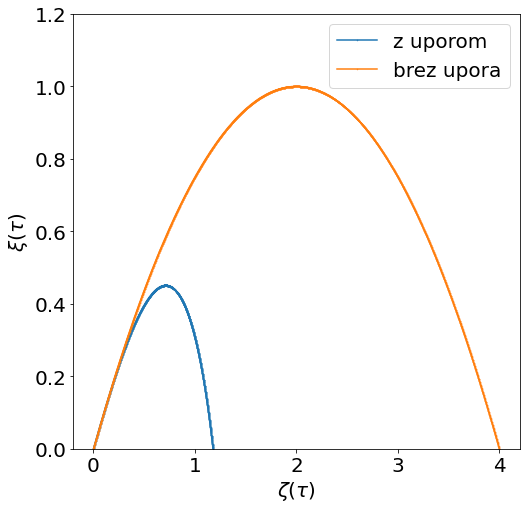

In [109]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(Y[0], Y[1],marker=".",ms=1,mfc="none", label='z uporom')
ax.plot(Y3[0], Y3[1],marker=".",ms=1,mfc="none", label='brez upora')

ax.set_xlabel(r"$\zeta$($\tau$)")
ax.set_ylabel(r"$\xi$($\tau$)")

ax.set_ylim([0,1.2])
ax.set_xlim([-0.2,4.2])

ax.legend()
fig.savefig("meta.pdf", bbox_inches="tight")

In [210]:
#drugi del naloge
A1 = 4*np.linspace(0.01, 0.99, 100)

fi = np.pi/4
Y0 = np.array([0,0,A1*np.cos(fi),A1*np.sin(fi)])

Ux = A1*np.cos(fi)
Uy = A1*np.sin(fi)
t=np.arange(0,3,0.001)

D=[]
D2=[]

In [211]:
def druganaloga(t,Z):
    dZ = np.zeros_like(Z)
    dZ[0]=Z[2]
    dZ[1]=Z[3]
    dZ[2]=-np.sqrt(Z[2]**2 + Z[3]**2)*Z[2]
    dZ[3]=-1-np.sqrt(Z[2]**2 + Z[3]**2)*Z[3]
    
    return dZ

In [212]:
for i in A1:
    fi = np.pi/4
    Z0 = np.array([0,0,i*np.cos(fi),i*np.sin(fi)])
    t=np.arange(0,20,0.001)
    
    sol = solve_ivp(druganaloga, [0,20], Z0, method='RK45', dense_output=True)
    Z = sol.sol(t)
    D.append(Z[0][np.where(Z[1]<0)[0][0]])


In [213]:
D2=[]
def druganaloga2(t,Z2):
    dZ2 = np.zeros_like(Z2)
    dZ2[0]=Z2[2]
    dZ2[1]=Z2[3]
    dZ2[2]=0
    dZ2[3]=-1
    
    return dZ2

In [214]:
for i in A1:
    fi = np.pi/4
    Z2 = np.array([0,0,i*np.cos(fi),i*np.sin(fi)])
    t=np.arange(0,20,0.001)
    
    sol = solve_ivp(druganaloga2, [0,20], Z2, method='RK45', dense_output=True)
    Z2 = sol.sol(t)
    D2.append(Z2[0][np.where(Z2[1] < 0)[0][0]])
    

In [215]:
Z2[1]

array([ 0.00000000e+00,  2.79964285e-03,  5.59828571e-03, ...,
       -1.43945548e+02, -1.43962745e+02, -1.43979944e+02])

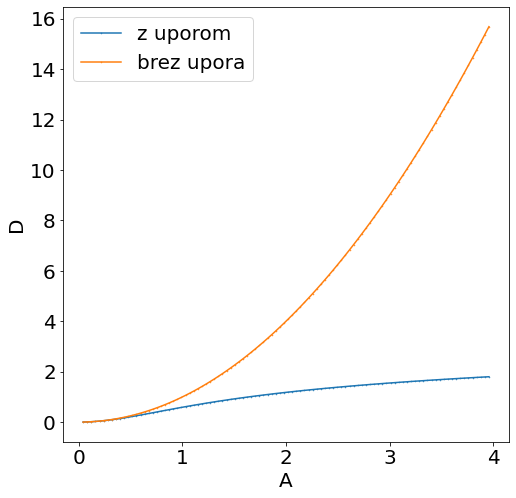

In [216]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(A1, D,marker=".",ms=1,mfc="none", label='z uporom')
ax.plot(A1, D2,marker=".",ms=1,mfc="none", label='brez upora')

ax.set_xlabel("A")
ax.set_ylabel("D")



ax.legend()
fig.savefig("domet_A.pdf", bbox_inches="tight")